In [3]:
# Importing library
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

data = pd.read_csv('C:/Users/yrmda/OneDrive/Desktop/PROJECTS/Research Paper Code/Dataset/Ola_3000.csv',encoding='ISO-8859-1')

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to categorize sentiment using VADER
def categorize_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    
    if sentiment_scores['compound'] >= 0.05:
        return 1  # Positive
    elif sentiment_scores['compound'] <= -0.05:
        return 0  # Negative
    else:
        return 0  # Neutral (you can change this to 1 if you consider it positive)
    
# Apply sentiment categorization to the DataFrame
df['Sentiment'] = df['Text'].apply(categorize_sentiment)

# Display the categorized data
print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yrmda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                 Tweet Id                                               Text  \
0      756346841973854209  Thank you for sending us your CRNs and showing...   
1      756455385557446656  @AverageIntel @PokemonGoApp \nWorry not, auto-...   
2      756455843374075904                 #KabaliDay https://t.co/jdQFl284qW   
3      756467451274027008  @suchetadalal We're in! Do let us know how we ...   
4      756468982169821184                    @suchetadalal @MoneylifeF Done.   
...                   ...                                                ...   
2994  1112319234749521920  @AkashRa66 Leak ?? #OlaRestrooms #NoPressure h...   
2995  1112319536852660225  @mahalakshmi3117 Wow, looks like theres a lea...   
2996  1112319856760639488  @Arijit10Sinha #NoPressure #OlaRestrooms https...   
2997  1112650634317029376  Thank you for laughing with us. While #OlaRest...   
2998  1112781478583128064  Thank you for laughing with us. While #OlaRest...   

     Name Screen Name                  

In [4]:
# Change the column name 
df.rename(columns={'Sentiment': 'Category'}, inplace=True)
df.head(4)


,Tweet Id,Text,Name,Screen Name,Created At,Favorites,Retweets,Language,Client,Tweet Type,Media Type,Media URLs,URLs,Hashtags,Mentions,Category
0,756346841973854209,Thank you for sending us your CRNs and showing...,Ola,Olacabs,Fri Jul 22 04:35:14 +0000 2016,23,14,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,0,1,0,1
1,756455385557446656,"@AverageIntel @PokemonGoApp \nWorry not, auto-...",Ola,Olacabs,Fri Jul 22 11:46:32 +0000 2016,3,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,2,0
2,756455843374075904,#KabaliDay https://t.co/jdQFl284qW,Ola,Olacabs,Fri Jul 22 11:48:21 +0000 2016,9,2,Undetermined,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Tweet,NaN,NaN,1,1,0,0
3,756467451274027008,@suchetadalal We're in! Do let us know how we ...,Ola,Olacabs,Fri Jul 22 12:34:29 +0000 2016,0,0,English,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Reply,NaN,NaN,0,0,1,1


In [5]:
df.rename(columns={'Text': 'Tweets'}, inplace=True)
data = df[['Tweets', 'Category']]
data.head(4) 

,Tweets,Category
0,Thank you for sending us your CRNs and showing...,1
1,"@AverageIntel @PokemonGoApp \nWorry not, auto-...",0
2,#KabaliDay https://t.co/jdQFl284qW,0
3,@suchetadalal We're in! Do let us know how we ...,1


In [ ]:
data.to_csv('Clean_Ola3000.csv', index=False)

In [49]:
# Importing Packages 

import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
clf = RandomForestClassifier()


In [18]:
# Cleaning Text

df_clean = data
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df_clean['clean'] = df_clean['Tweets'].astype('str') 
df_clean.dtypes

df_clean["tokens"] = df_clean["clean"].apply(tokenizer.tokenize)

C:\Users\yrmda\AppData\Local\Temp\ipykernel_2508\3973370011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean'] = df_clean['Tweets'].astype('str')
C:\Users\yrmda\AppData\Local\Temp\ipykernel_2508\3973370011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["tokens"] = df_clean["clean"].apply(tokenizer.tokenize)


In [19]:
data.head(4)

,Tweets,Category,clean,tokens
0,Thank you for sending us your CRNs and showing...,1,Thank you for sending us your CRNs and showing...,"[Thank, you, for, sending, us, your, CRNs, and..."
1,"@AverageIntel @PokemonGoApp \nWorry not, auto-...",0,"@AverageIntel @PokemonGoApp \nWorry not, auto-...","[AverageIntel, PokemonGoApp, Worry, not, auto,..."
2,#KabaliDay https://t.co/jdQFl284qW,0,#KabaliDay https://t.co/jdQFl284qW,"[KabaliDay, https, t, co, jdQFl284qW]"
3,@suchetadalal We're in! Do let us know how we ...,1,@suchetadalal We're in! Do let us know how we ...,"[suchetadalal, We, re, in, Do, let, us, know, ..."


In [21]:
# Importing 

import gensim
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [22]:
import multiprocessing
from gensim.models import Word2Vec

# WORD2VEC()
cores = multiprocessing.cpu_count() # Count the number of cores in a computer, important for a parameter of the model
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,  # Use 'vector_size' instead of 'size'
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [23]:
# BUILD_VOCAB()
w2v_model.build_vocab(df_clean["tokens"], progress_per=1000)

# TRAIN()
w2v_model.train(df_clean["tokens"], total_examples=w2v_model.corpus_count, epochs=10000, report_delay=1)


(55655534, 591400000)

In [40]:
#First defining the X (input), and the y (output)

y =data['Category'].values
X = np.array(df_clean["tokens"])

#And here is the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)

In [42]:
vectorizer = CountVectorizer()

In [43]:
vectorizer

CountVectorizer()

In [44]:
X_train_flattened = [' '.join(tokens) for tokens in X_train]
X_test_flattened = [' '.join(tokens) for tokens in X_test]

In [45]:
X_train = vectorizer.fit_transform(X_train_flattened)

In [46]:
X_test = vectorizer.transform(X_test_flattened)

In [47]:
feature_names = vectorizer.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))

Number of features: 7469


In [50]:
scores = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5)
print("Mean Cross-Validation accuracy: {:.2f}".format(np.mean(scores)))

Mean Cross-Validation accuracy: 0.79


In [51]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.998
Testing set score: 0.855


In [52]:
pred_logreg = logreg.predict(X_test)
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion Matrix: \n{}".format(confusion))

Confusion Matrix: 
[[132  33]
 [ 54 381]]


In [54]:
# Multinomial Naive Base Model
from sklearn.naive_bayes import MultinomialNB

In [55]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("Training set score: {:.3f}".format(nb.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(nb.score(X_test, y_test)))

Training set score: 0.950
Testing set score: 0.795


In [56]:
pred_nb = nb.predict(X_test)
confusion = confusion_matrix(y_test, pred_nb)
print("Confusion Matrix: \n{}".format(confusion))

Confusion Matrix: 
[[ 64 101]
 [ 22 413]]


In [57]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, bootstrap= True, max_features = 'sqrt')
rf.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 1.000
Testing set score: 0.828


In [58]:
pred_rf = rf.predict(X_test)
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix: \n{}".format(confusion))

Confusion Matrix: 
[[ 91  74]
 [ 29 406]]


In [59]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have your original sparse data in X_train_sparse and X_test_sparse, and labels in y_train and y_test
# You need to perform data preprocessing and transformation before using X_train_transformed and X_test_transformed

# Example preprocessing steps (you should adjust these according to your data):
scaler = StandardScaler(with_mean=False)  # Pass with_mean=False for sparse matrices
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [60]:
# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=0)

# Fit the model on the training data
xgb_classifier.fit(X_train_transformed, y_train)

# Evaluate the model on the test data
accuracy = xgb_classifier.score(X_test_transformed, y_test)
print("XGBoost Classifier Accuracy: {:.3f}".format(accuracy))


XGBoost Classifier Accuracy: 0.862


In [61]:
from sklearn.svm import SVC

# Initialize the SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=0)

# Fit the model on the training data
svm_classifier.fit(X_train_transformed, y_train)

# Evaluate the model on the test data
accuracy = svm_classifier.score(X_test_transformed, y_test)
print("SVM Classifier Accuracy: {:.3f}".format(accuracy))

SVM Classifier Accuracy: 0.788


In [68]:
# Compare the accuracy 

import matplotlib.pyplot as plt
import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC
# import xgboost as xgb

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt'),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=0),
    "SVM": SVC(kernel='linear', C=1.0, random_state=0)
}

accuracies = {}

# Train and test each classifier, then store the accuracy
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Print accuracies or use for visualization
print("Accuracies:", accuracies)



Accuracies: {'Logistic Regression': 0.855, 'Naive Bayes': 0.795, 'Random Forest': 0.83, 'XGBoost': 0.8616666666666667, 'SVM': 0.845}


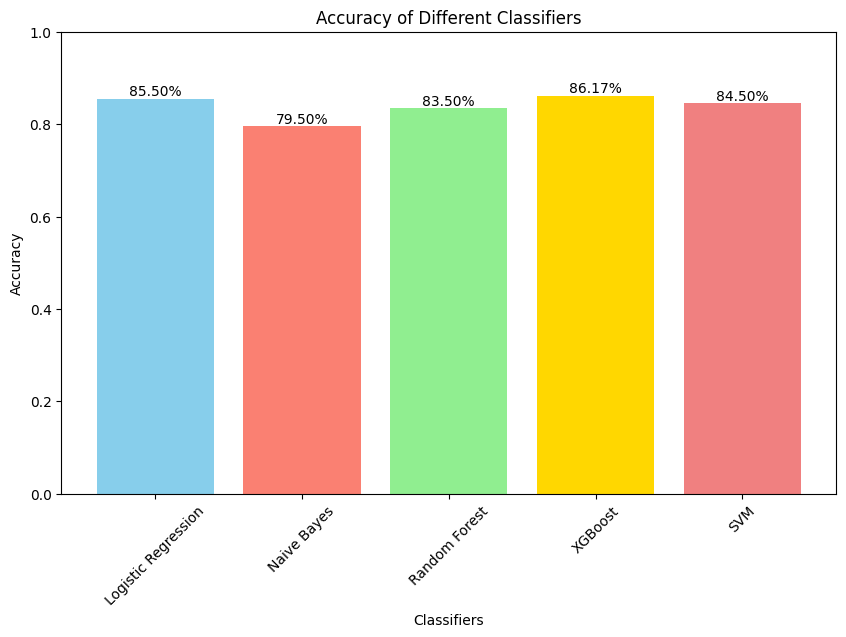

In [71]:

import matplotlib.pyplot as plt

# The code for classifiers and accuracy calculation remains the same as provided in the previous response

# Train and test each classifier, then store the accuracy
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Plotting the accuracies with percentage labels and different colors
plt.figure(figsize=(10, 6))

# List of colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']

bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for accuracy
plt.xticks(rotation=45)

# Add percentage labels on each bar with two decimal points
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval*100:.2f}%", ha='center', va='bottom')

plt.show()



C:\Users\yrmda\AppData\Local\Temp\ipykernel_2508\843311641.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


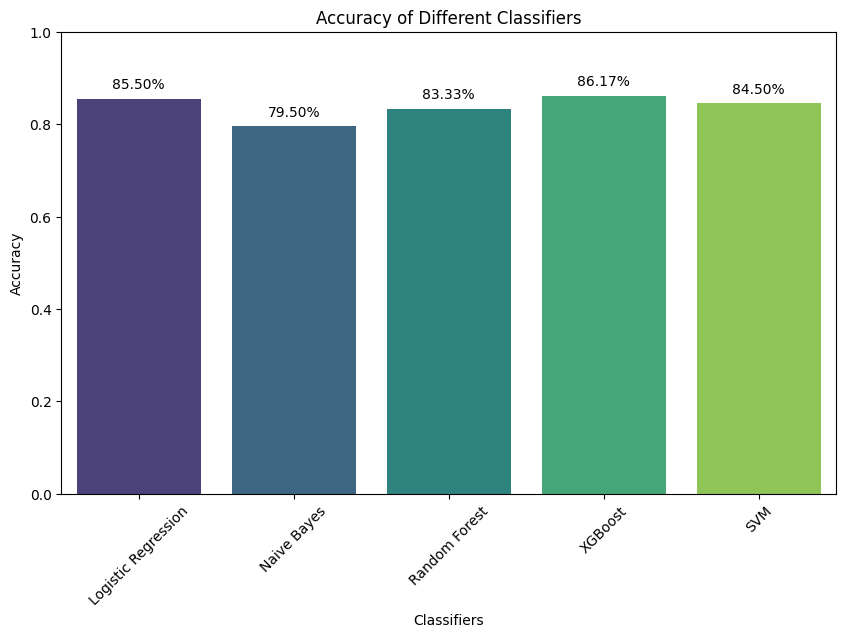

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# The code for classifiers and accuracy calculation remains the same as provided in the previous responses

# Train and test each classifier, then store the accuracy
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Plotting the accuracies using Seaborn
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')

plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for accuracy
plt.xticks(rotation=45)

# Show the accuracy value on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()
